# Analisando as vendas da empresa
- Vamos utilizar a base disponível em:
    - https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv
    - Essa é uma base de dados real, porém anonimizada
- Fizemos alguns tratamentos nos dados e disponibilizamos em 3 arquivos:
    - `base_vendas.xlsx`: todos os dados de venda por item da empresa, onde cada linha representa 1 item vendido
    - `base_pagamentos.xlsx`: base com as formas de pagamento usado naquela compra
    - `olist_order_reviews_dataset.csv`: base com o review dos pedidos, exatamente como baixada do Kaggle, onde cada linha representa a avaliação de uma pedido

## Importando e entendendo as bases

In [1]:
# Importando o pandas
import pandas as pd

In [2]:
# Importando a base de vendas
vendas = pd.read_excel('base_vendas.xlsx')

In [3]:
# Visualizando as 3 primeiras linhas
vendas.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08


In [4]:
# Verificando as informações da base
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111923 entries, 0 to 111922
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       111923 non-null  object        
 1   customer_id                    111923 non-null  object        
 2   order_status                   111923 non-null  object        
 3   order_purchase_timestamp       111923 non-null  datetime64[ns]
 4   order_approved_at              111808 non-null  datetime64[ns]
 5   order_delivered_carrier_date   110050 non-null  datetime64[ns]
 6   order_delivered_customer_date  108804 non-null  datetime64[ns]
 7   order_estimated_delivery_date  111923 non-null  datetime64[ns]
 8   order_item_id                  111206 non-null  float64       
 9   product_id                     111206 non-null  object        
 10  seller_id                      111206 non-null  object        
 11  

In [5]:
# Também analisando as informações estatísticas
vendas.describe()

,order_item_id,price,freight_value,dia_compra,mes_compra,ano_compra
count,111206.000000,111206.000000,111206.000000,111923.000000,111923.000000,111923.000000
mean,1.198020,120.845955,20.032079,15.512853,6.000670,2017.541167
std,0.706445,183.941756,15.847991,8.667442,3.241051,0.498305
min,1.000000,0.850000,0.000000,1.000000,1.000000,2017.000000
25%,1.000000,39.900000,13.080000,8.000000,3.000000,2017.000000
50%,1.000000,74.990000,16.280000,15.000000,6.000000,2018.000000
75%,1.000000,134.990000,21.180000,23.000000,8.000000,2018.000000
max,21.000000,6735.000000,409.680000,31.000000,12.000000,2018.000000


In [6]:
# Importando a base de pagamentos
pagamentos = pd.read_excel('base_pagamentos.xlsx')

In [7]:
# Visualizando as 3 primeiras linhas dessa base
pagamentos.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,3,voucher,1,2.00


In [8]:
# E também as informações
pagamentos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102528 entries, 0 to 102527
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102528 non-null  object        
 1   customer_id                    102528 non-null  object        
 2   order_status                   102528 non-null  object        
 3   order_purchase_timestamp       102528 non-null  datetime64[ns]
 4   order_approved_at              102399 non-null  datetime64[ns]
 5   order_delivered_carrier_date   100730 non-null  datetime64[ns]
 6   order_delivered_customer_date  99500 non-null   datetime64[ns]
 7   order_estimated_delivery_date  102528 non-null  datetime64[ns]
 8   payment_sequential             102528 non-null  int64         
 9   payment_type                   102528 non-null  object        
 10  payment_installments           102528 non-null  int64         
 11  

In [9]:
# Também analisando as informações estatísticas
pagamentos.describe()

,payment_sequential,payment_installments,payment_value
count,102528.00000,102528.000000,102528.000000
mean,1.09337,2.854332,154.309690
std,0.71027,2.686302,217.916223
min,1.00000,0.000000,0.000000
25%,1.00000,1.000000,56.860000
50%,1.00000,1.000000,100.000000
75%,1.00000,4.000000,172.080000
max,29.00000,24.000000,13664.080000


## Verificando as principais informações dessas bases

### Sobre os pagamentos

In [10]:
# Visualizando novamente a base
pagamentos.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,voucher,1,18.59


In [11]:
# Quais as dimensões dessa base?
pagamentos.shape

(102528, 12)

In [12]:
# Como eu poderia pegar apenas uma coluna dessa base?
pagamentos.payment_type

0         credit_card
1             voucher
2             voucher
3              boleto
4         credit_card
             ...     
102523    credit_card
102524    credit_card
102525    credit_card
102526    credit_card
102527     debit_card
Name: payment_type, Length: 102528, dtype: object

In [13]:
# Qual foi o total de transações nessas vendas?
pagamentos.payment_type.count()

102528

In [14]:
# Como podemos contar a quantidade de vendas por cada tipo de pagamento?
pagamentos.payment_type.value_counts()

credit_card    75809
boleto         19543
voucher         5690
debit_card      1486
Name: payment_type, dtype: int64

**Obs: nesse caso vamos assumir que se em uma transação teve mais de 1 tipo de pagamento, vamos considerar a contagem de cada um deles, mesmo que sejam do mesmo tipo**

In [15]:
# Como eu poderia calcular o % de transação por tipo de pagamento?

# Salvando o total de transações em uma variável
transacoes_total = pagamentos.payment_type.count()

# E as transações por tipo de pagamentos em outra
transacoes_tipo = pagamentos.payment_type.value_counts()

# Podemos dividir as transações por cada tipo pelo total e multiplicar por 100
round((transacoes_tipo/transacoes_total)*100,2)

credit_card    73.94
boleto         19.06
voucher         5.55
debit_card      1.45
Name: payment_type, dtype: float64

In [16]:
# Como eu poderia acessar a quantidade de transações por cartão de crédito?
transacoes_tipo.credit_card

75809

In [17]:
# E a quantidade de transações por boleto?
transacoes_tipo.boleto

19543

In [18]:
# Quantas vezes maior é o número de transações por cartão de crédito?
transacoes_tipo.credit_card/transacoes_tipo.boleto

3.8790871411758685

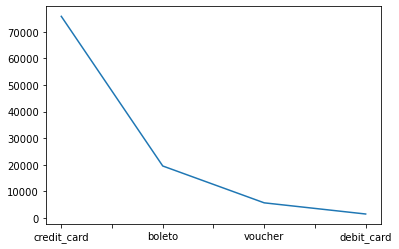

In [19]:
# E como seria possível exibir o tipo de pagamento de forma visual?
transacoes_tipo.plot();

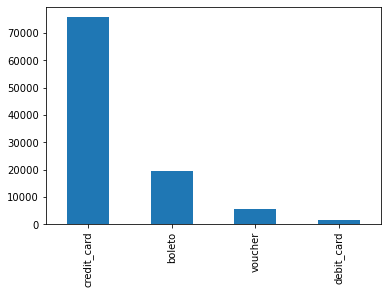

In [20]:
# E se eu quiser mostrar como um gráfico de barras?
transacoes_tipo.plot.bar();

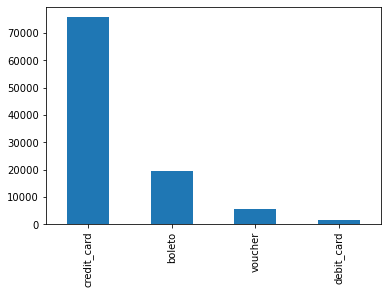

In [21]:
# E podemos salvar isso como imagem para então colocar em um Power Point

# Primeiro vamos importar o matplotlib
import matplotlib.pyplot as plt

# E então salvar essa figura
transacoes_tipo.plot.bar();
plt.savefig('transacoes_tipo')

**Podemos também ajustar os parâmetros da imagem**
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

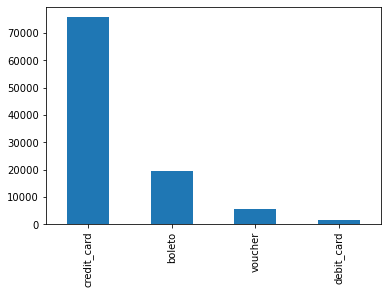

In [22]:
# Podemos ajustar a figura que exportamos e retirar os fundos
transacoes_tipo.plot.bar();
plt.savefig('transacoes_tipo',bbox_inches='tight',transparent=True)

In [23]:
# Agora vamos usar o .value_counts() com o número de parcelas
pagamentos.payment_installments.value_counts()

1     51817
2     12255
3     10335
4      7015
10     5247
5      5184
8      4232
6      3872
7      1598
9       637
12      132
15       72
18       27
11       22
24       18
20       17
13       15
14       15
17        7
16        4
21        3
0         2
23        1
22        1
Name: payment_installments, dtype: int64

In [24]:
# Vamos novamente visualizar a base
pagamentos.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,3,voucher,1,2.00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1,credit_card,3,179.12


In [25]:
# Vamos, antes de fazer o .value_counts(), filtrar a base apenas para transações em crédito
pagamentos.loc[pagamentos.payment_type == 'credit_card']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1,credit_card,3,179.12
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,1,credit_card,1,72.20
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,1,credit_card,1,28.62
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09,2017-07-09,2017-07-11,2017-07-26,2017-08-01,1,credit_card,6,175.26
...,...,...,...,...,...,...,...,...,...,...,...,...
102522,880675dff2150932f1601e1c07eadeeb,47cd45a6ac7b9fb16537df2ccffeb5ac,delivered,2017-02-23,2017-02-23,2017-03-01,2017-03-06,2017-03-22,1,credit_card,3,155.99
102523,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09,2017-03-09,2017-03-10,2017-03-17,2017-03-28,1,credit_card,3,85.08
102524,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06,2018-02-06,2018-02-07,2018-02-28,2018-03-02,1,credit_card,3,195.00
102525,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27,2017-08-27,2017-08-28,2017-09-21,2017-09-27,1,credit_card,5,271.01


In [26]:
# Agora vamos pegar apenas a coluna de número de parcelas
pagamentos.loc[pagamentos.payment_type == 'credit_card','payment_installments']

0         1
4         3
5         1
6         1
7         6
         ..
102522    3
102523    3
102524    3
102525    5
102526    4
Name: payment_installments, Length: 75809, dtype: int64

In [27]:
# E só então fazer o .value_counts()
pagamentos.loc[pagamentos.payment_type == 'credit_card','payment_installments'].value_counts()

1     25098
2     12255
3     10335
4      7015
10     5247
5      5184
8      4232
6      3872
7      1598
9       637
12      132
15       72
18       27
11       22
24       18
20       17
13       15
14       15
17        7
16        4
21        3
0         2
23        1
22        1
Name: payment_installments, dtype: int64

In [115]:
# Para visualizar melhor podemos ordenar pelo index usando o .sort_index()
pagamento_parcelado = pagamentos.loc[pagamentos.payment_type == 
                                     'credit_card','payment_installments'].value_counts().sort_index()

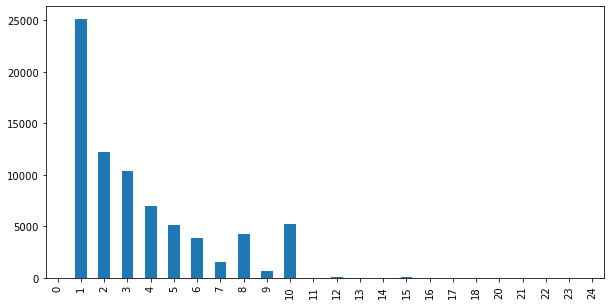

In [29]:
# Podemos também visualizar de forma gráfica
pagamento_parcelado.plot.bar(figsize=(10,5));

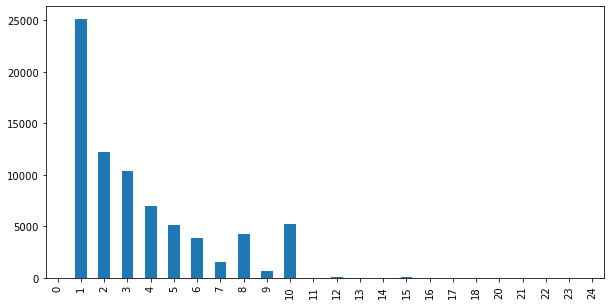

In [30]:
# E exportar essa figura
pagamento_parcelado.plot.bar(figsize=(10,5));
plt.savefig('transacoes_parcelas',bbox_inches='tight',transparent=True)

In [31]:
# Como eu poderia calcular o % de cada quantidade de parcelas?

# Salvando o total de transações parceladas em uma variável
total_parcelado = pagamento_parcelado.sum()

# E o número de parcelas em outra
pagamento_parcelado

# Visualizando em %
round((pagamento_parcelado/total_parcelado)*100,2)

0      0.00
1     33.11
2     16.17
3     13.63
4      9.25
5      6.84
6      5.11
7      2.11
8      5.58
9      0.84
10     6.92
11     0.03
12     0.17
13     0.02
14     0.02
15     0.09
16     0.01
17     0.01
18     0.04
20     0.02
21     0.00
22     0.00
23     0.00
24     0.02
Name: payment_installments, dtype: float64

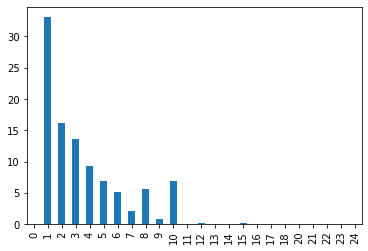

In [32]:
# E também podemos visualizar esse valor de forma gráfica
round((pagamento_parcelado/total_parcelado)*100,2).plot.bar();

**Agora vamos começar a analisar o valor das parcelas**

In [33]:
# Relembrando, verificando a quantidade comprada
pagamentos.payment_value.count()

102528

In [34]:
# E agora vendo o valor total da compra
pagamentos.payment_value.sum()

15821063.889999997

In [35]:
# Calculando o valor médio da parcela
pagamentos.payment_value.sum()/pagamentos.payment_value.count()

154.30968993835828

In [36]:
# Calculando diretamente a média
pagamentos.payment_value.mean()

154.30968993835037

In [37]:
pagamentos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,voucher,1,18.59
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,3,voucher,1,2.00
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1,credit_card,3,179.12


In [38]:
# Qual seria a média por tipo de pagamento?
pagamentos.groupby('payment_type')['payment_value'].mean()

payment_type
boleto         145.430333
credit_card    163.530169
debit_card     143.290572
voucher         64.838404
Name: payment_value, dtype: float64

In [39]:
# Qual seria o valor total por tipo de pagamento?
pagamentos.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)

payment_type
credit_card    1.239706e+07
boleto         2.842145e+06
voucher        3.689305e+05
debit_card     2.129298e+05
Name: payment_value, dtype: float64

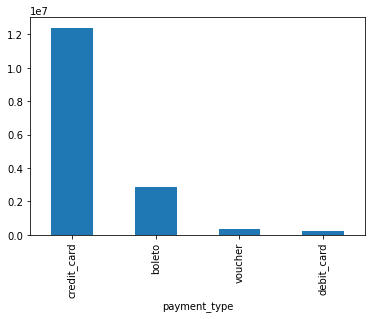

In [40]:
# Visualizando de forma gráfica
pagamentos.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False).plot.bar();

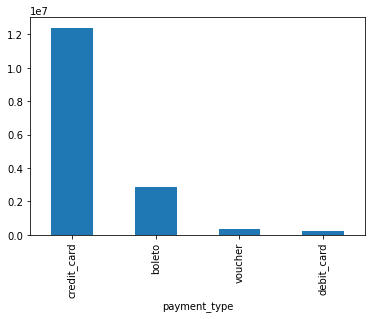

In [41]:
# Exportando esse visual
pagamentos.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False).plot.bar();
plt.savefig('transacoes_valor',bbox_inches='tight',transparent=True)

In [42]:
pagamentos.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,2,voucher,1,18.59


In [43]:
# Será que a média em 10 parcelas é maior que nos outros parcelamentos?
pagamentos[pagamentos.payment_type == 'credit_card'].groupby('payment_installments')['payment_value'].mean()

payment_installments
0      94.315000
1      96.133129
2     127.260781
3     142.776074
4     164.268574
5     183.344851
6     210.148698
7     188.499869
8     308.104910
9     203.799953
10    414.834061
11    125.478636
12    323.144470
13    151.318000
14    167.962667
15    451.722083
16    285.677500
17    174.224286
18    486.483333
20    615.801765
21    243.700000
22    228.710000
23    236.480000
24    610.048889
Name: payment_value, dtype: float64

### Sobre as vendas

In [44]:
# Visualizando novamente a base
vendas.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08


In [45]:
# Verificando se existem valores nulos
vendas.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 115
order_delivered_carrier_date     1873
order_delivered_customer_date    3119
order_estimated_delivery_date       0
order_item_id                     717
product_id                        717
seller_id                         717
shipping_limit_date               717
price                             717
freight_value                     717
product_category_name            2315
customer_unique_id                  0
customer_city                       0
customer_state                      0
dia_compra                          0
mes_compra                          0
ano_compra                          0
ano_mes                             0
dtype: int64

In [46]:
# Verificando a soma do preço pago pelo cliente
preco = vendas.price.sum()

In [47]:
# Relembrando a soma do valor total na base de pagamentos
pagamentos.payment_value.sum()

15821063.889999997

In [48]:
# Essa diferença é dada pelo frete?
frete = vendas.freight_value.sum()

In [49]:
# Somando esses dois valores
preco+frete

15666482.600000001

In [50]:
# Então vamos entender os valores onde o preço é nulo
vendas.loc[vendas.price.isnull(),'order_id']

300       8e24261a7e58791d10cb1bf9da94df5c
658       c272bcd21c287498b4883c7512019702
778       37553832a3a89c9b2db59701c357ca67
834       d57e15fb07fd180f06ab3926b39edcd2
1302      2f634e2cebf8c0283e7ef0989f77d217
                        ...               
111597    6cf5c427fb11bc5fe8abefa86aa7ba0b
111691    1c7c8ab324927f5b6e52338bd110bef4
111709    aaab15da689073f8f9aa978a390a69d1
111824    a69ba794cc7deb415c3e15a0a3877e69
111895    5fabc81b6322c8443648e1b21a6fef21
Name: order_id, Length: 717, dtype: object

In [51]:
# Podemos olhar esses ids na tabela de pagamentos de forma manual
pagamentos[pagamentos.order_id == '8e24261a7e58791d10cb1bf9da94df5c']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
275,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16,2017-11-16,NaT,NaT,2017-12-05,1,credit_card,5,84.0


In [52]:
# Para analisar de forma mais escalável, podemos utilizar o .isin() para filtrar todos esses ids

# Selecionando todos os order_ids onde o preço é nulo
ids = vendas.loc[vendas.price.isnull(),'order_id']

# Filtrando esses ids na base de pagamento
pagamentos[pagamentos.order_id.isin(ids)]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
275,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16,2017-11-16,NaT,NaT,2017-12-05,1,credit_card,5,84.00
603,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31,2018-01-31,NaT,NaT,2018-02-16,1,credit_card,1,97.68
705,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14,2017-08-17,NaT,NaT,2017-09-05,1,boleto,1,132.46
753,d57e15fb07fd180f06ab3926b39edcd2,470b93b3f1cde85550fc74cd3a476c78,unavailable,2018-01-08,2018-01-09,NaT,NaT,2018-02-06,1,boleto,1,134.38
1184,2f634e2cebf8c0283e7ef0989f77d217,7353b0fb8e8d9675e3a704c60ca44ebe,unavailable,2017-09-27,2017-09-28,NaT,NaT,2017-10-27,1,credit_card,12,615.53
...,...,...,...,...,...,...,...,...,...,...,...,...
102320,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23,2017-12-23,NaT,NaT,2018-01-19,1,credit_card,3,110.09
102321,1c7c8ab324927f5b6e52338bd110bef4,95b1767df51d6fa09402267d8de314df,unavailable,2017-12-23,2017-12-23,NaT,NaT,2018-01-19,2,voucher,1,824.00
102339,aaab15da689073f8f9aa978a390a69d1,df20748206e4b865b2f14a5eabbfcf34,unavailable,2018-01-16,2018-01-17,NaT,NaT,2018-02-06,1,boleto,1,210.09
102434,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23,2017-08-28,NaT,NaT,2017-09-15,1,credit_card,2,195.91


In [53]:
# Qual o valor total desses ids?
diferenca_nulos = pagamentos.loc[pagamentos.order_id.isin(ids),'payment_value'].sum()

In [54]:
# Já encontramos toda a diferença?
preco+frete+diferenca_nulos

15818217.510000002

**Exemplos de ordens:**<br>
- ce6d150fb29ada17d2082f4847107665
- 70b742795bc441e94a44a084b6d9ce7a
- 996c7e73600ad3723e8627ab7bef81e4

In [55]:
# Verificando essa ordem na base de vendas
vendas[vendas.order_id == 'ce6d150fb29ada17d2082f4847107665']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
13161,ce6d150fb29ada17d2082f4847107665,d8acb46c718975948423dbf1b603b959,delivered,2018-01-25,2018-01-27,2018-01-29,2018-02-21,2018-03-08,1.0,638bbb2a5e4f360b71f332ddfebfd672,...,1299.0,104.66,construcao_ferramentas_construcao,3629a4b18f2eb69e03f153158e48d2cc,alta floresta,MT,25,1,2018,2018-01


In [56]:
1299.0+104.66

1403.66

In [57]:
# Agora verificando na base de pagamentos
pagamentos[pagamentos.order_id == 'ce6d150fb29ada17d2082f4847107665']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
12123,ce6d150fb29ada17d2082f4847107665,d8acb46c718975948423dbf1b603b959,delivered,2018-01-25,2018-01-27,2018-01-29,2018-02-21,2018-03-08,1,credit_card,10,1586.47


In [58]:
# Retirando da base de vendas valores com o preço igual a nulo
vendas = vendas[vendas.price.notnull()]

In [59]:
# Verificando novamente os valores nulos
vendas.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1156
order_delivered_customer_date    2402
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1598
customer_unique_id                  0
customer_city                       0
customer_state                      0
dia_compra                          0
mes_compra                          0
ano_compra                          0
ano_mes                             0
dtype: int64

In [60]:
# Entendendo os status com a coluna order_delivered_customer_date nula
vendas[vendas.order_delivered_customer_date.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,2017-04-13,NaT,NaT,2017-05-09,1.0,a1804276d9941ac0733cfd409f5206eb,...,49.90,16.05,NaN,36edbb3fb164b1f16485364b6fb04c73,santa rosa,RS,11,4,2017,2017-04
46,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04,2018-06-05,2018-06-05,NaT,2018-06-28,1.0,c50ca07e9e4db9ea5011f06802c0aea0,...,14.49,7.87,beleza_saude,08fb46d35bb3ab4037202c23592d1259,jundiai,SP,4,6,2018,2018-06
115,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03,2018-08-07,NaT,NaT,2018-08-21,1.0,1522589c64efd46731d3522568e5bc83,...,35.00,15.35,artigos_de_natal,c7f8d7b1fffc946d7069574f74c39f4e,santo amaro da imperatriz,SC,3,8,2018,2018-08
143,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03,2017-09-03,NaT,NaT,2017-10-03,1.0,61d52f4882421048afd530db53d6f230,...,125.90,12.38,perfumaria,9f269af9c49244f6ba4a46985a3cfc2e,sao paulo,SP,3,9,2017,2017-09
180,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10,2018-01-11,2018-01-11,NaT,2018-02-07,1.0,ee0c1cf2fbeae95205b4aa506f1469f0,...,53.99,15.13,perfumaria,528b011eb7fab3d59c336cc7248eed3a,paracatu,MG,10,1,2018,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111583,aea0db338150b526dde24f6fd953a5ed,379a02efdc6a56bd27f99b95fc2f6c06,processing,2017-12-26,2017-12-26,NaT,NaT,2018-01-26,1.0,aa428a8e4d587520f90d37a08030a812,...,96.90,16.44,brinquedos,43fb4e33ebe4ac765e99c7b57e5d6940,aquidauana,MS,26,12,2017,2017-12
111592,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01,2017-10-01,NaT,NaT,2017-10-27,1.0,dc2410804cf782c5d87dbcd201b74e9b,...,150.00,16.81,informatica_acessorios,0f75924cbbe60142068f4029d744b724,curitiba,PR,1,10,2017,2017-10
111593,6560fb10610771449cb0463c5ba12199,0d07d0a588caf93cc66b7a8aff86d2fe,canceled,2017-10-01,2017-10-01,NaT,NaT,2017-10-27,2.0,dc2410804cf782c5d87dbcd201b74e9b,...,150.00,16.81,informatica_acessorios,0f75924cbbe60142068f4029d744b724,curitiba,PR,1,10,2017,2017-10
111635,636cdd02667dc8d76d9296bf20a6890a,c162256b133c76f79181ce61d66545db,shipped,2018-02-17,2018-02-20,2018-02-20,NaT,2018-03-14,1.0,52c80cedd4e90108bf4fa6a206ef6b03,...,179.00,45.71,ferramentas_jardim,39552b92919b5aacffcd326b13af0397,taubate,SP,17,2,2018,2018-02


In [61]:
# Verificando todos os status
vendas.loc[vendas.order_delivered_customer_date.isnull(),'order_status'].value_counts()

shipped       1171
canceled       525
processing     355
invoiced       340
delivered        8
approved         3
Name: order_status, dtype: int64

In [62]:
# Retirando vendas onde o status seja cancelado
vendas = vendas[vendas.order_status != 'canceled']

In [63]:
# Verificando novamente os valores nulos
vendas.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      700
order_delivered_customer_date    1877
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name            1584
customer_unique_id                  0
customer_city                       0
customer_state                      0
dia_compra                          0
mes_compra                          0
ano_compra                          0
ano_mes                             0
dtype: int64

**Podemos substituir produtos sem categoria por "Outros"**

In [64]:
# Primeiro filtrando a base apenas para produtos sem categoria
vendas[vendas.product_category_name.isnull()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11,2017-04-13,NaT,NaT,2017-05-09,1.0,a1804276d9941ac0733cfd409f5206eb,...,49.90,16.05,NaN,36edbb3fb164b1f16485364b6fb04c73,santa rosa,RS,11,4,2017,2017-04
119,bfe42c22ecbf90bc9f35cf591270b6a7,803ac05904124294f8767894d6da532b,delivered,2018-01-27,2018-01-27,2018-02-03,2018-02-09,2018-02-26,1.0,71225f49be70df4297892f6a5fa62171,...,27.30,15.10,NaN,34c58672601f2c6d29db7efd1f6bf958,bonfinopolis de minas,MG,27,1,2018,2018-01
207,58ac1947c1a9067b9f416cba6d844a3f,ee8e1d37f563ecc11cc4dcb4dfd794c2,delivered,2017-09-13,2017-09-13,2017-09-14,2017-09-21,2017-09-25,1.0,9820e04e332fc450d6fd975befc1bc28,...,110.00,14.16,NaN,5cbf29b2dcf212a6a5d864b887238c72,sao paulo,SP,13,9,2017,2017-09
259,e22b71f6e4a481445ec4527cb4c405f7,1faf89c8f142db3fca6cf314c51a37b6,delivered,2017-04-22,2017-04-22,2017-04-24,2017-05-02,2017-05-11,1.0,3bc5164bc7f4be77002d6651da65c98c,...,22.50,11.74,NaN,1268b060098ed3f22c2e7c34cc72a1a8,itapagipe,MG,22,4,2017,2017-04
297,a094215e786240fcfefb83d18036a1cd,86acfb656743da0c113d176832c9d535,delivered,2018-02-08,2018-02-08,2018-02-09,2018-02-19,2018-02-22,1.0,5a848e4ab52fd5445cdc07aab1c40e48,...,122.99,9.06,NaN,f5cb81f98962f7504bef1e75579b6dff,americana,SP,8,2,2018,2018-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111503,1a10e938a1c7d8e5eecc3380f71ca76b,8a81607347c25d881d995d94de6ad824,delivered,2018-07-25,2018-07-26,2018-07-27,2018-08-01,2018-08-10,1.0,8d39a63db6a98e40571f486e0c711cf7,...,127.20,18.99,NaN,75fe53e03a8a9797acb680ce8710da8b,volta redonda,RJ,25,7,2018,2018-07
111673,e33865519137f5737444109ae8438633,64b086bdcc54458af3ea3bd838db54a5,delivered,2018-05-28,2018-05-29,2018-05-30,2018-06-01,2018-06-20,1.0,e9cbc0910ab050cbd92fbeb051c270ea,...,33.85,8.29,NaN,82ffeb20040f58e6c008e4402fa6f992,sao paulo,SP,28,5,2018,2018-05
111680,f0dd9af88d8ef5a8e4670fbbedaf19c4,30ddb50bd22ee927ebe308ea3da60735,delivered,2017-09-02,2017-09-05,2017-09-14,2017-09-15,2017-09-19,1.0,0c877471e35049402bca235e06cb8063,...,84.90,15.35,NaN,1d627d8a6e1e33ea8eeeb7a17d998660,santos,SP,2,9,2017,2017-09
111686,272874573723eec18f23c0471927d778,48e080c8001e92ebea2b64e474f91a60,delivered,2017-12-20,2017-12-20,2017-12-21,2017-12-26,2018-01-09,1.0,5a848e4ab52fd5445cdc07aab1c40e48,...,122.99,9.06,NaN,da59579685bd771fdd4f90fb50d28cd3,guarulhos,SP,20,12,2017,2017-12


In [65]:
# Agora vamos pegar apenas a coluna de categoria
vendas.loc[vendas.product_category_name.isnull(),'product_category_name']

6         NaN
119       NaN
207       NaN
259       NaN
297       NaN
         ... 
111503    NaN
111673    NaN
111680    NaN
111686    NaN
111703    NaN
Name: product_category_name, Length: 1584, dtype: object

In [66]:
# E então atribuir o valor outros
vendas.loc[vendas.product_category_name.isnull(),'product_category_name'] = 'outros'

In [67]:
# Quantos valores nulos ainda temos?
vendas.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date      700
order_delivered_customer_date    1877
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
customer_unique_id                  0
customer_city                       0
customer_state                      0
dia_compra                          0
mes_compra                          0
ano_compra                          0
ano_mes                             0
dtype: int64

**Depois de tratar valores vazios, podemos começar a visualizar as informações dessa base**

In [68]:
vendas.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08


In [69]:
# Verificando a soma da venda por dia
vendas.groupby('order_purchase_timestamp')['price'].sum()

order_purchase_timestamp
2017-01-06      916.38
2017-01-07     1351.90
2017-01-08      709.58
2017-01-09      673.79
2017-01-10     1434.87
                ...   
2018-08-16    35166.77
2018-08-17    31683.18
2018-08-18    24340.95
2018-08-19    25487.39
2018-08-20    34479.50
Name: price, Length: 592, dtype: float64

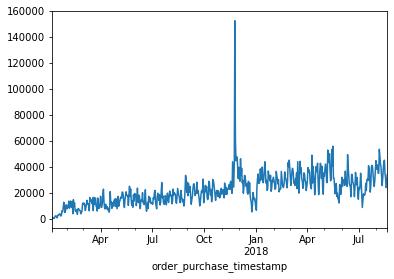

In [70]:
# Mostrando de forma gráfica
vendas.groupby('order_purchase_timestamp')['price'].sum().plot();

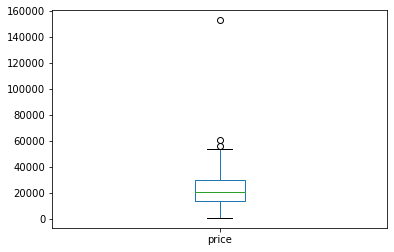

In [71]:
# Também podemos visualizar esses dados em um boxplot
vendas.groupby('order_purchase_timestamp')['price'].sum().plot.box();

**Vamos tentar isolar o período que temos um valor muito discrepante do resto**

In [72]:
# Importando o datetime para nos ajudar a trabalhar com datas
import datetime as dt

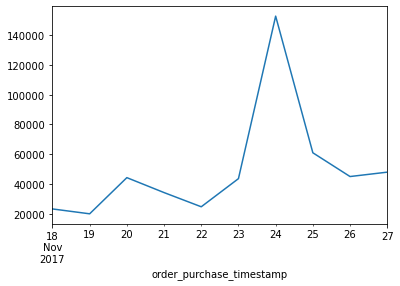

In [73]:
# E agora fazendo um filtro da base exatamente nesse período
vendas[(vendas.order_purchase_timestamp >= dt.datetime(2017,11,18)) &
       (vendas.order_purchase_timestamp <= dt.datetime(2017,11,27))
      ].groupby('order_purchase_timestamp')['price'].sum().plot();

In [74]:
# Eliminando essa data discrepante
vendas = vendas[vendas.order_purchase_timestamp != dt.datetime(2017,11,24)]

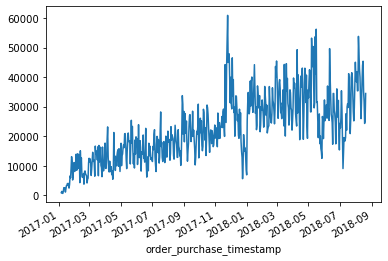

In [75]:
# E novamente visualizando a base
vendas.groupby('order_purchase_timestamp')['price'].sum().plot();

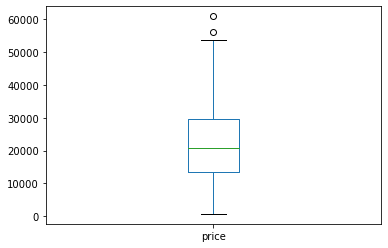

In [76]:
# Podemos novamente fazer o boxplot
vendas.groupby('order_purchase_timestamp')['price'].sum().plot.box();

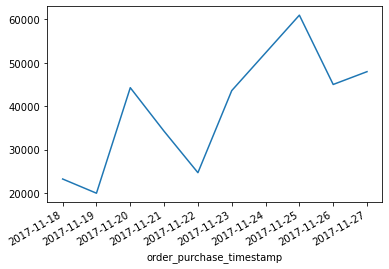

In [77]:
# E novamente filtrar o período discrepante
vendas[(vendas.order_purchase_timestamp >= dt.datetime(2017,11,18)) &
       (vendas.order_purchase_timestamp <= dt.datetime(2017,11,27))
      ].groupby('order_purchase_timestamp')['price'].sum().plot();

In [78]:
# E então também eliminar o dia 25/11/2017
vendas = vendas[vendas.order_purchase_timestamp != dt.datetime(2017,11,25)]

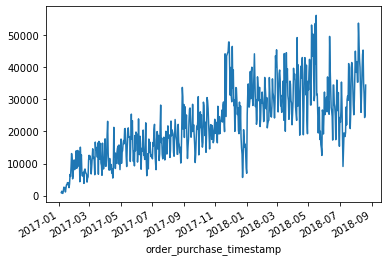

In [79]:
# Visualizando novamente a base
vendas.groupby('order_purchase_timestamp')['price'].sum().plot();

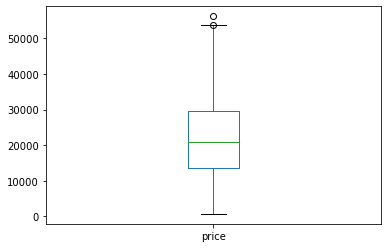

In [80]:
# E o boxplot desses dados
vendas.groupby('order_purchase_timestamp')['price'].sum().plot.box();

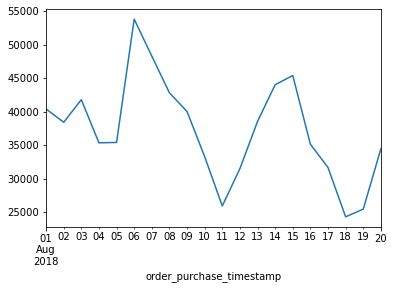

In [81]:
# Filtrando o período discrepante em agosto
vendas[(vendas.order_purchase_timestamp >= dt.datetime(2018,8,1)) &
       (vendas.order_purchase_timestamp <= dt.datetime(2018,8,30))
      ].groupby('order_purchase_timestamp')['price'].sum().plot();

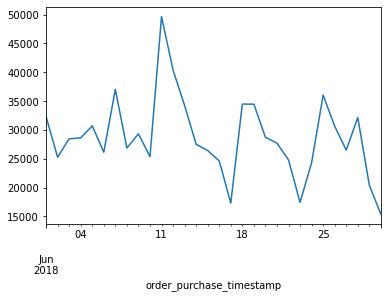

In [82]:
# E o período em junho
vendas[(vendas.order_purchase_timestamp >= dt.datetime(2018,6,1)) &
       (vendas.order_purchase_timestamp <= dt.datetime(2018,6,30))
      ].groupby('order_purchase_timestamp')['price'].sum().plot();

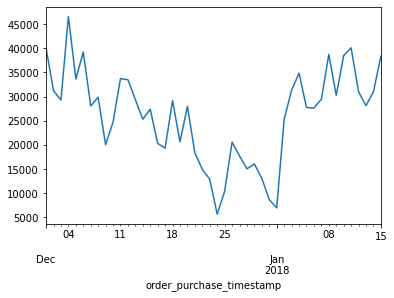

In [83]:
# Visualizando também o período com baixas vendas
vendas[(vendas.order_purchase_timestamp >= dt.datetime(2017,12,1)) &
       (vendas.order_purchase_timestamp <= dt.datetime(2018,1,15))
      ].groupby('order_purchase_timestamp')['price'].sum().plot();

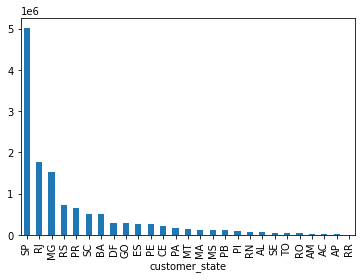

In [84]:
# Agora podemos responder outras perguntas como:
# Existe concentração de venda por estado?
vendas.groupby('customer_state')['price'].sum().sort_values(ascending=False).plot.bar();

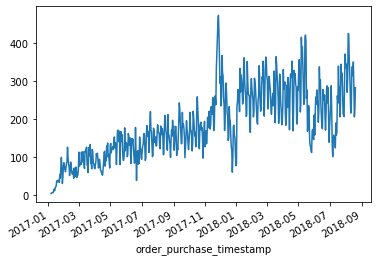

In [85]:
# Agora também podemos ver a venda quantidade em relação ao tempo
vendas.groupby('order_purchase_timestamp')['price'].count().plot();

**Observe a ordem 1b15974a0141d54e36626dca3fdc731a**

In [86]:
# Contando quantas vezes essa ordem aparece
vendas[vendas.order_id == '1b15974a0141d54e36626dca3fdc731a']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
97752,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,1.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97753,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,2.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97754,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,3.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97755,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,4.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97756,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,5.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97757,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,6.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97758,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,7.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97759,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,8.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97760,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,9.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97761,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,10.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02


In [87]:
# Visualizando essa ordem
vendas[vendas.order_id == '1b15974a0141d54e36626dca3fdc731a']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
97752,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,1.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97753,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,2.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97754,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,3.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97755,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,4.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97756,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,5.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97757,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,6.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97758,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,7.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97759,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,8.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97760,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,9.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02
97761,1b15974a0141d54e36626dca3fdc731a,be1b70680b9f9694d8c70f41fa3dc92b,delivered,2018-02-22,2018-02-24,2018-03-02,2018-03-05,2018-03-08,10.0,ee3d532c8a438679776d222e997606b3,...,100.0,10.12,informatica_acessorios,c402f431464c72e27330a67f7b94d4fb,sao paulo,SP,22,2,2018,2018-02


In [88]:
# Podemos isolar apenas a base de ordens e datas do pedido
vendas.loc[vendas.order_id == '1b15974a0141d54e36626dca3fdc731a',['order_id','order_purchase_timestamp']]

,order_id,order_purchase_timestamp
97752,1b15974a0141d54e36626dca3fdc731a,2018-02-22
97753,1b15974a0141d54e36626dca3fdc731a,2018-02-22
97754,1b15974a0141d54e36626dca3fdc731a,2018-02-22
97755,1b15974a0141d54e36626dca3fdc731a,2018-02-22
97756,1b15974a0141d54e36626dca3fdc731a,2018-02-22
97757,1b15974a0141d54e36626dca3fdc731a,2018-02-22
97758,1b15974a0141d54e36626dca3fdc731a,2018-02-22
97759,1b15974a0141d54e36626dca3fdc731a,2018-02-22
97760,1b15974a0141d54e36626dca3fdc731a,2018-02-22
97761,1b15974a0141d54e36626dca3fdc731a,2018-02-22


In [89]:
# E então eliminar os valores duplicados dessa base
vendas.loc[vendas.order_id == '1b15974a0141d54e36626dca3fdc731a',['order_id','order_purchase_timestamp']].drop_duplicates()

,order_id,order_purchase_timestamp
97752,1b15974a0141d54e36626dca3fdc731a,2018-02-22


In [90]:
vendas_qtd = vendas[['order_id','order_purchase_timestamp']]
vendas_qtd = vendas_qtd.drop_duplicates()

In [91]:
# Agora observe novamente essa ordem
vendas_qtd[vendas_qtd.order_id == '1b15974a0141d54e36626dca3fdc731a']

,order_id,order_purchase_timestamp
97752,1b15974a0141d54e36626dca3fdc731a,2018-02-22


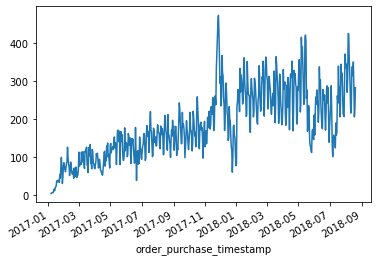

In [92]:
# Dessa forma, podemos traçar esse gráfico de forma correta
vendas.groupby('order_purchase_timestamp')['order_id'].count().plot();

**Podemos também filtrar a base de venda valor já tratada para alguma categoria específica**

In [93]:
# Verificando as categorias mais frequentes
vendas.groupby('product_category_name')['price'].count().sort_values(ascending=False)

product_category_name
cama_mesa_banho                                  10712
beleza_saude                                      9331
esporte_lazer                                     8363
moveis_decoracao                                  7982
informatica_acessorios                            7606
                                                 ...  
cds_dvds_musicais                                   14
portateis_cozinha_e_preparadores_de_alimentos       13
pc_gamer                                             8
fashion_roupa_infanto_juvenil                        8
seguros_e_servicos                                   2
Name: price, Length: 74, dtype: int64

In [94]:
# Verificando por valor vendido
vendas.groupby('product_category_name')['price'].sum().sort_values(ascending=False)

product_category_name
beleza_saude                     1215371.11
relogios_presentes               1166708.22
cama_mesa_banho                  1001616.80
esporte_lazer                     956416.10
informatica_acessorios            885143.81
                                    ...    
flores                              1110.04
casa_conforto_2                      760.27
cds_dvds_musicais                    730.00
fashion_roupa_infanto_juvenil        569.85
seguros_e_servicos                   283.29
Name: price, Length: 74, dtype: float64

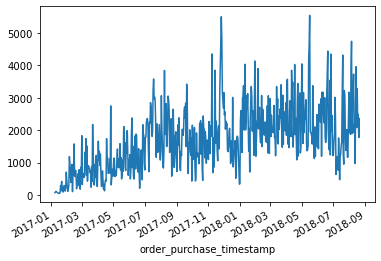

In [95]:
# Fazendo a soma de apenas uma categoria
categoria = 'cama_mesa_banho'
vendas[vendas.product_category_name == categoria].groupby('order_purchase_timestamp')['price'].sum().plot();

**Também podemos calcular as informações da entrega**

In [96]:
# Visualizando a base
vendas.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18,2017-11-18,2017-11-22,2017-12-02,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,18,11,2017,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13,2018-02-13,2018-02-14,2018-02-16,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,13,2,2018,2018-02


In [97]:
# Calculando a diferença, em dias, entre a entrega estimada e a entrega realizada
(vendas.order_estimated_delivery_date - vendas.order_delivered_customer_date).dt.days

0          8.0
1          6.0
2         18.0
3         13.0
4         10.0
          ... 
111918     2.0
111919     6.0
111920    21.0
111921    21.0
111922    18.0
Length: 108734, dtype: float64

In [98]:
# Criando uma variável na base com esse valor
vendas['DifDias'] = (vendas.order_estimated_delivery_date - vendas.order_delivered_customer_date).dt.days

In [99]:
vendas.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,customer_unique_id,customer_city,customer_state,dia_compra,mes_compra,ano_compra,ano_mes,DifDias
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02,2017-10-02,2017-10-04,2017-10-10,2017-10-18,1.0,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2,10,2017,2017-10,8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24,2018-07-26,2018-07-26,2018-08-07,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,af07308b275d755c9edb36a90c618231,barreiras,BA,24,7,2018,2018-07,6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08,2018-08-08,2018-08-08,2018-08-17,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,8,8,2018,2018-08,18.0


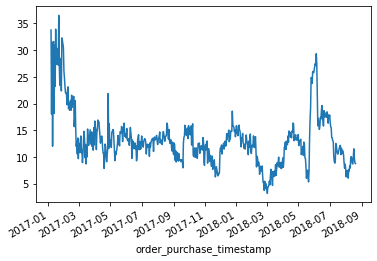

In [100]:
# Visualizando a média dos dias de entrega
vendas.groupby('order_purchase_timestamp')['DifDias'].mean().plot();

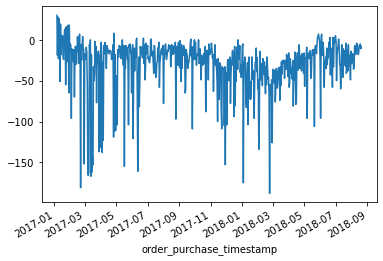

In [101]:
# Visualizando o mínimo dos dias de entrega
vendas.groupby('order_purchase_timestamp')['DifDias'].min().plot();

In [102]:
# Podemos então criar uma nova coluna definindo se a entrega atrasou ou não
vendas['FlagAtraso'] = vendas.DifDias.apply(lambda x: 1 if(x<0) else 0)

In [103]:
# Filtrando apenas as colunas de pedido, entrega e as novas colunas criadas
verifica_datas = vendas[['order_estimated_delivery_date','order_delivered_customer_date','DifDias','FlagAtraso']]

In [104]:
# Filtrando apenas order_estimated_delivery_date > order_delivered_customer_date
verifica_datas[verifica_datas.order_estimated_delivery_date 
               > verifica_datas.order_delivered_customer_date]

,order_estimated_delivery_date,order_delivered_customer_date,DifDias,FlagAtraso
0,2017-10-18,2017-10-10,8.0,0
1,2018-08-13,2018-08-07,6.0,0
2,2018-09-04,2018-08-17,18.0,0
3,2017-12-15,2017-12-02,13.0,0
4,2018-02-26,2018-02-16,10.0,0
...,...,...,...,...
111918,2018-03-02,2018-02-28,2.0,0
111919,2017-09-27,2017-09-21,6.0,0
111920,2018-02-15,2018-01-25,21.0,0
111921,2018-02-15,2018-01-25,21.0,0


In [105]:
# Verificando os valores na coluna entrega
verifica_datas.loc[verifica_datas.order_estimated_delivery_date 
               < verifica_datas.order_delivered_customer_date,'DifDias'].value_counts().sort_index()

-188.0      1
-181.0      1
-175.0      1
-167.0      1
-166.0      1
         ... 
-5.0      490
-4.0      466
-3.0      539
-2.0      574
-1.0      897
Name: DifDias, Length: 113, dtype: int64

In [106]:
# Verificando os valores na coluna Flag Atraso
verifica_datas.loc[verifica_datas.order_estimated_delivery_date 
               == verifica_datas.order_delivered_customer_date,'FlagAtraso'].value_counts().sort_index()

0    1357
Name: FlagAtraso, dtype: int64

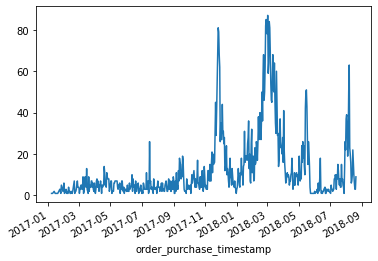

In [107]:
# Verificando os atrasos por dia
vendas[(vendas.FlagAtraso == 1) & (vendas.order_delivered_customer_date.notnull())].groupby('order_purchase_timestamp')['FlagAtraso'].count().plot();

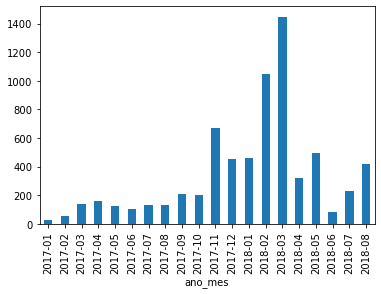

In [108]:
# Verificando os atrasos por ano e mês
vendas[(vendas.FlagAtraso == 1) & (vendas.order_delivered_customer_date.notnull())].groupby('ano_mes')['FlagAtraso'].count().plot.bar();

### A análise da diferença dos valores

In [109]:
vendas = pd.read_excel('base_vendas.xlsx')

In [110]:
pagamentos = pd.read_excel('base_pagamentos.xlsx')

In [111]:
# Podemos agregar a base de vendas pelo preço e frete
agg_vendas = vendas.groupby('order_id')[['price','freight_value']].sum()

In [112]:
# E agregar a base de pagamentos pelo valor pago
agg_pagamentos = pagamentos.groupby('order_id')['payment_value'].sum()

In [113]:
# Concatenando essas duas bases
agg = pd.concat([agg_vendas,agg_pagamentos],axis=1)
agg.head()

,price,freight_value,payment_value
order_id,,,
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19
00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83
000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87
00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04


In [114]:
agg.index.name = None

In [334]:
agg

,price,freight_value,payment_value
00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,72.19
00018f77f2f0320c557190d7a144bdd3,239.90,19.93,259.83
000229ec398224ef6ca0657da4fc703e,199.00,17.87,216.87
00024acbcdf0a6daa1e931b038114c75,12.99,12.79,25.78
00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,218.04
...,...,...,...
fffc94f6ce00a00581880bf54a75a037,299.99,43.41,343.40
fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,386.53
fffce4705a9662cd70adb13d4a31832d,99.90,16.95,116.85
fffe18544ffabc95dfada21779c9644f,55.99,8.72,64.71


In [335]:
# Vamos também criar uma coluna para calcular o valor total da compra
agg['total'] = agg.price+agg.freight_value

In [336]:
# E calculando a diferença entre os valores
agg['Dif'] = agg.total - agg.payment_value

In [340]:
# Filtrando para valores onde o valor da compra é vazio
agg.loc[agg.price == 0,'payment_value'].sum()

151734.91

In [342]:
# E aquelas colunas onde existe uma diferença entre o valor da compra e o valor pago
agg.loc[agg.price != 0,'Dif'].sum()

-2846.37999999996

In [349]:
# Visualizando essa tabela
agg.loc[(abs(agg.Dif) > 10) & (agg.price != 0)]

,price,freight_value,payment_value,total,Dif
00789ce015e7e5791c7914f32bb4fad4,154.00,14.83,190.81,168.83,-21.98
016726239765c18f66826453f39c64e3,219.99,15.14,265.77,235.13,-30.64
02f4dd90ba0feb8ec394cac05862d2b5,79.90,51.06,141.65,130.96,-10.69
061c97a9bd7911f9d2031e1b820c344f,299.00,16.26,329.80,315.26,-14.54
10a6730b0b333e2b017dd139a0530f19,97.90,29.09,143.53,126.99,-16.54
...,...,...,...,...,...
e99bb46d32c47a666290f7c5928f7236,119.99,16.60,154.38,136.59,-17.79
ee9dfabed586581a184f72e03544b4a2,289.00,18.50,342.12,307.50,-34.62
fa0d5b3cb1f2221766145a60ba18ac64,109.90,19.31,141.32,129.21,-12.11
faf132fb35b3b3b533a67efbd6e7c02d,89.90,25.12,130.01,115.02,-14.99
